<a href="https://colab.research.google.com/github/rpdahxn/HandsOnML/blob/main/06_decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 설정

In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## 6.1 결정 트리 학습과 시각화

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:]  # 꽃잎 길이와 너비
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth = 2, random_state = 42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

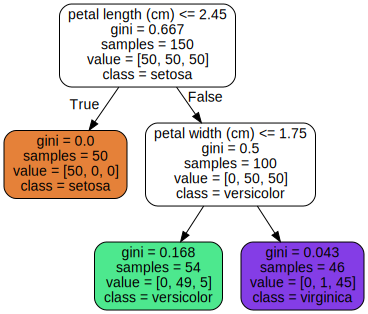

In [3]:
# 훈련된 결정 트리를 시각화한다.
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

## 6.2 예측하기

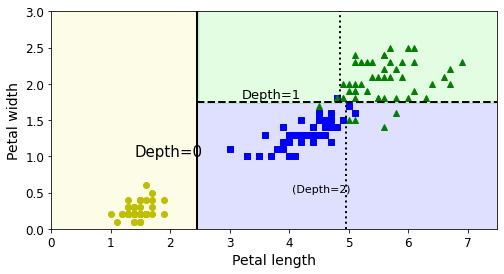

In [4]:
# 결정 트리의 결정 경계

from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

## 6.3 클래스 확률 추정

In [5]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

인덱스 1의 확률이 가장 높은 것을 알 수 있다.

In [6]:
tree_clf.predict([[5, 1.5]])

array([1])

.predict()로 확인해 보면 인덱스1 값이 나온다.

## 6.7 규제 매개변수
사이킷런에서 사용하는 CART 훈련 알고리즘은 확률적이기 때문에 동일한 데이터에서 같은 모델을 훈련하여 매번 다른 모델을 만들 수 있다.  
이를 확인하기 위해 random_state를 다른 값으로 지정해 본다.

In [7]:
tree_clf_tweaked = DecisionTreeClassifier(max_depth = 2, random_state = 40)
tree_clf_tweaked.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=40)

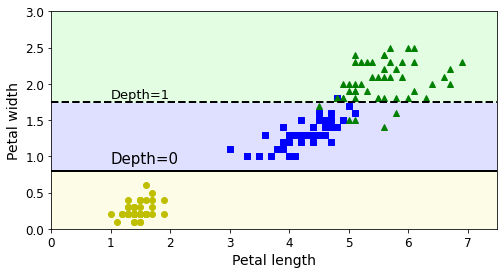

In [8]:
# <그림 6-8. 훈련 세트의 세부사항에 민감한 결정 트리> 생성 코드

plt.figure(figsize = (8, 4))
plot_decision_boundary(tree_clf_tweaked, X, y, legend = False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth = 2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth = 2)
plt.text(1.0, 0.9, "Depth=0", fontsize = 15)
plt.text(1.0, 1.80, "Depth=1", fontsize = 13)

plt.show()

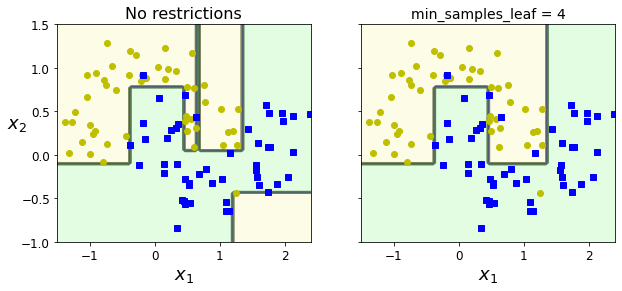

In [9]:
# <그림 6-3. min_samples_leaf 매개 변수를 사용한 규제> 생성 코드

from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples = 100, noise = 0.25, random_state = 53)

deep_tree_clf1 = DecisionTreeClassifier(random_state = 42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf = 4, random_state = 42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols = 2, figsize = (10, 4), sharey = True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes = [-1.5, 2.4, -1, 1.5], iris = False)
plt.title("No restrictions", fontsize = 16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes = [-1.5, 2.4, -1, 1.5], iris = False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize = 14)
plt.ylabel("")

plt.show()

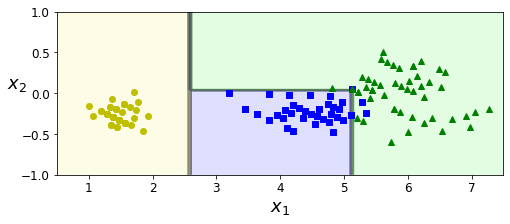

In [10]:
# 데이터셋을 회전하면 완전히 다른 결정 경계를 만든다.

angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

tree_clf_r = DecisionTreeClassifier(random_state = 42)
tree_clf_r.fit(Xr, y)

plt.figure(figsize = (8, 3))
plot_decision_boundary(tree_clf_r, Xr, y, axes = [0.5, 7.5, -1.0, 1], iris = False)

plt.show()

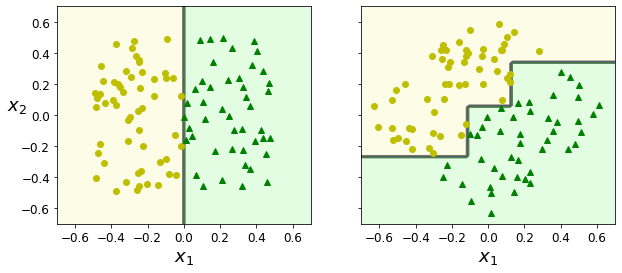

In [11]:
# <그림 6-7. 훈련 세트의 회전에 민감한 결정 트리> 생성 코드

np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state = 42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state = 42)
tree_clf_sr.fit(Xsr, ys)

fig, axes = plt.subplots(ncols = 2, figsize = (10, 4), sharey = True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_s, Xs, ys, axes = [-0.7, 0.7, -0.7, 0.7], iris = False)
plt.sca(axes[1])
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes = [-0.7, 0.7, -0.7, 0.7], iris = False)
plt.ylabel("")

plt.show()

## 6.8 회귀

In [12]:
# 사이킷런의 DecisionTreeRegressor를 사용해 잡음이 섞인 2차 함수 형태의 데이터셋에서 max_depth=2 설정으로 회귀 트리를 만들어 본다.

np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [13]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth = 2, random_state = 42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

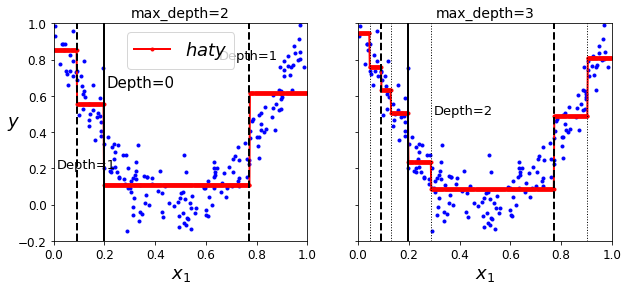

In [14]:
# <그림 6-5. 두 개의 결정 트리 회귀 모델의 예측> 생성 코드

from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state = 42, max_depth = 2)
tree_reg2 = DecisionTreeRegressor(random_state = 42, max_depth = 3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes = [0, 1, -0.2, 1], ylabel = "$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize = 18)
    if ylabel:
        plt.ylabel(ylabel, fontsize = 18, rotation = 0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth = 2, label = r"$hat{y}$")

fig, axes = plt.subplots(ncols = 2, figsize = (10, 4), sharey = True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth = 2)
plt.text(0.21, 0.65, "Depth=0", fontsize = 15)
plt.text(0.01, 0.2, "Depth=1", fontsize = 13)
plt.text(0.65, 0.8, "Depth=1", fontsize = 13)
plt.legend(loc = "upper center", fontsize = 18)
plt.title("max_depth=2", fontsize = 14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel = None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth = 2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth = 1)
plt.text(0.3, 0.5, "Depth=2", fontsize = 13)
plt.title("max_depth=3", fontsize = 14)

plt.show()

In [15]:
# <그림 6-4. 회귀 결정 트리> 생성 코드

export_graphviz(
    tree_reg1, 
    out_file = os.path.join(IMAGES_PATH, "regression_tree.dot"),
    feature_names = ["x1"],
    rounded = True,
    filled = True
)

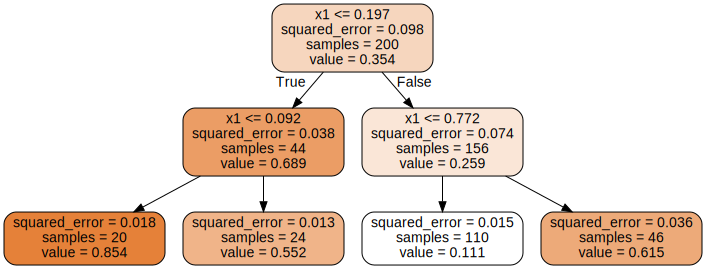

In [16]:
Source.from_file(os.path.join(IMAGES_PATH, "regression_tree.dot"))

그림 저장: tree_regression_regularization_plot


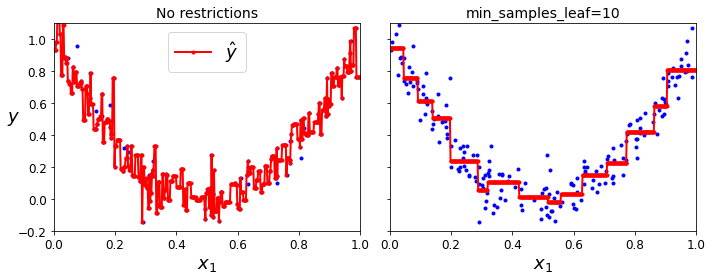

In [17]:
# <그림 6-6. 결정 트리 회귀 모델의 규제> 생성 코드

tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

save_fig("tree_regression_regularization_plot")
plt.show()

## 6.10 연습문제  
7. 다음 단계를 따라 moons 데이터셋에 결정 트리를 훈련시키고 세밀하게 튜닝해라.

a. make_moons(n_samples = 1000, noise = 0.4)를 사용해 데이터셋을 생성한다.

In [18]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 10000, noise = 0.4, random_state = 42)

b. 이를 train_test_split()을 사용해 훈련 세트와 테스트 세트로 나눈다.

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

c. DecisionTreeClassifier의 최적의 매개변수를 찾기 위해 교차 검증과 함께 그리드 탐색을 수행해라. (GridSearchCV 사용) 힌트: 여러 가지 max_leaf_nodes 값을 시도해봐라.

In [ ]:
# 아건 내가 시도해본 것
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV

# tree_clf = DecisionTreeClassifier(random_state = 42)
# parameters = {'max_leaf_nodes': [10, 100, 1000]}
# clf = GridSearchCV(tree_clf, parameters)
# clf.fit(X_train, y_train)
# clf.cv_results_
# tree_clf = DecisionTreeClassifier(max_leaf_nodes = 10, random_state = 42)
# tree_clf.fit(X_train, y_train)

In [20]:
# 정답 코드

from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [21]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=17, random_state=42)

d. 찾은 매개변수를 사용해 전체 훈련 세트에 대해 모델을 훈련시키고 테스트 세트에서 성능을 측정한다.  이때 대략 85~87%의 정확도가 나온다.

In [22]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8695


8. 다음 단계를 따라 랜덤 포레스트를 만들어보세요.
a. 이전 연습문제에 이어서, 훈련 세트의 서브셋을 1000개 생성한다. 각각은 무작위로 생성된 100개의 샘플을 담고 있다. 힌트: 사이킷런의 ShuffleSplit을 사용할 수 있다.

In [23]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

mini_sets = []

rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances, random_state=42)
for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

b. 이전 연습문제에서 찾은 최적의 매개변수를 사용해 각 서브셋에 결정 트리를 훈련시킨다. 테스트 세트로 이 1000개의 결정 트리를 평가한다. 더 작은 데이터셋에서 훈련되었기 때문에 이 결정 트리는 앞서 만든 결정 트리보다 성능이 떨어져 약 80%의 정확도를 낸다.

In [24]:
# 내 코드

# tree_clf = DecisionTreeClassifier(max_leaf_nodes = 21, random_state = 42)
# score = 0

# for mini_train_index, mini_test_index in rs.split(X_train):
#     X_mini_train = X_train[mini_train_index]
#     y_mini_train = y_train[mini_train_index]
#     tree_clf.fit(X_mini_train, y_mini_train)
#     y_pred = tree_clf.predict(X_test)
#     score += accuracy_score(y_test, y_pred)

# print(score // n_trees)

In [25]:
# 정답 코드

from sklearn.base import clone

forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

np.mean(accuracy_scores)

0.8054499999999999

c. 각 테스트 세트 샘플에 대해 1000개의 결정 트리 예측을 만들고 다수로 나온 예측만 취한다.(사이파이의 mode()함수를 사용) 그러면 테스트에 대한 **다수결 예측**이 만들어진다.

In [26]:
Y_pred = np.empty([n_trees, len(X_test)], dtype = np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [27]:
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(Y_pred, axis = 0)

d. 테스트 세트에서 이 예측을 평가한다. 앞서 만든 모델보다 조금 높은 정확도를 얻게 된다. 

In [29]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.872